In [1]:

import numpy as np
import scipy.misc
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import Adam

Using TensorFlow backend.


In [7]:
np.random.seed(123)  # for reproducibility

In [8]:
xs = []
ys = []

#points to the end of the last batch
train_batch_pointer = 0
val_batch_pointer = 0

In [9]:
#read data.txt
with open("/home/dhanshri/Documents/Deep learning/Midterm Project/Self Driving/coding stage 1/Autopilot-TensorFlow-master/driving_dataset/data.txt") as f:
    for line in f:
        xs.append("/home/dhanshri/Documents/Deep learning/Midterm Project/Self Driving/coding stage 1/Autopilot-TensorFlow-master/driving_dataset/" + line.split()[0])
        #the paper by Nvidia uses the inverse of the turning radius,
        #but steering wheel angle is proportional to the inverse of turning radius
        #so the steering wheel angle in radians is used as the output
        ys.append(float(line.split()[1]) * scipy.pi / 180)

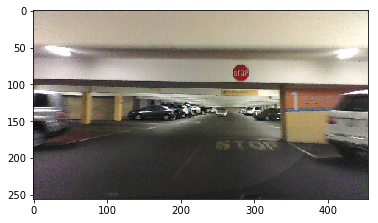

In [10]:

from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread(xs[100])
plt.imshow(img)
plt.show()

In [11]:
img.shape

(256, 455, 3)

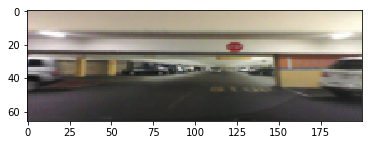

In [12]:
imgr=scipy.misc.imresize(img,[66, 200])
plt.imshow(imgr)
plt.show()

In [13]:
xs_train = xs[:int(len(xs) * 0.1)]
ys_train = ys[:int(len(xs) * 0.1)]

xs_val=xs[-int(len(xs)*0.05):]
ys_val=ys[-int(len(xs)*0.05):]

xs_test = xs[-int(len(xs) * 0.2):]
ys_test = ys[-int(len(xs) * 0.2):]

In [14]:

len(xs_train)

4540

In [15]:
#x1=scipy.misc.imread(xs_train[1]).astype('float32')/255


X_train=[]
for i in range(len(xs_train)):
    X_train.append(scipy.misc.imresize(scipy.misc.imread(xs_train[i]),[66, 200]).astype('float32')/255)

In [16]:
Y_train=[]

for i in range(len(ys_train)):
    Y_train.append(ys_train[i])



In [24]:
X_val=[]
for i in range(len(xs_val)):
    X_val.append(scipy.misc.imresize(scipy.misc.imread(xs_val[i]),[66, 200]).astype('float32')/255)
    
Y_val=[]

for i in range(len(ys_val)):
    Y_val.append(ys_val[i])

In [37]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_val=np.array(X_val)
Y_val=np.array(Y_val)

In [ ]:
################################
#check the shape

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [36]:
Y_train.shape

(4540,)

In [47]:
model = Sequential()
model.add(Convolution2D(64, 3, 3, input_shape=(66, 200,3), border_mode='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
model.add(Dropout(0.5))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))


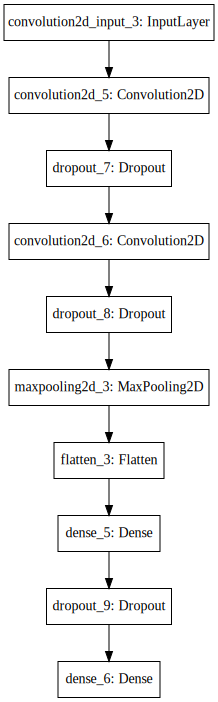

In [48]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [49]:
model.compile(optimizer=Adam(lr=1e-4), loss = 'mse')
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_5 (Convolution2D)  (None, 66, 200, 64)   1792        convolution2d_input_3[0][0]      
____________________________________________________________________________________________________
dropout_7 (Dropout)              (None, 66, 200, 64)   0           convolution2d_5[0][0]            
____________________________________________________________________________________________________
convolution2d_6 (Convolution2D)  (None, 66, 200, 64)   36928       dropout_7[0][0]                  
____________________________________________________________________________________________________
dropout_8 (Dropout)              (None, 66, 200, 64)   0           convolution2d_6[0][0]            
___________________________________________________________________________________________

In [ ]:
model.fit(X_train, Y_train,validation_data=(X_val, Y_val), nb_epoch=2, batch_size=32, verbose=1)


Train on 4540 samples, validate on 2270 samples
Epoch 1/2
 320/4540 [=>............................] - ETA: 70125s - loss: 7.2891 

In [13]:
"""X_train=[]
for i in range(0,len(xs_train)):
    X_train.append(mpimg.imread(xs_train[i]).astype('float32')/255.0)

"""

In [46]:
X_val.shape

(2270, 66, 200, 3)